In [15]:
#Import all required libraries
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, average_precision_score,recall_score,precision_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import joblib

In [2]:
#Import Dataset with node2vec derived embeddings
path_X_train='./X_train_with_embeddings.csv'
path_X_test='./X_test_with_embeddings.csv'
path_y_train='./sample_y_train.csv'
path_y_test='./sample_y_test.csv'

X_trainval = pd.read_csv(path_X_train)
y_trainval = pd.read_csv(path_y_train)
X_test = pd.read_csv(path_X_test)
y_test = pd.read_csv(path_y_test)

In [3]:
#Preprocess the 3 columns that are categorical:"Receiving Currency","Payment Currency","Payment Format"
#and One-hot encode them
X_trainval = X_trainval.dropna(axis=0)
X_trainval = X_trainval.drop(["Unnamed: 0"], axis=1)


#Preprocess the 3 columns that are required to be ont hot-coded
to_encode = ["Receiving Currency","Payment Currency","Payment Format"]
lab = preprocessing.OneHotEncoder()
for i in to_encode:
  data = lab.fit_transform(X_trainval[[i]]).toarray()   
  temp = pd.DataFrame(data,columns=lab.categories_[0]).add_prefix(i+"_")
  X_trainval = pd.concat([X_trainval, temp], axis=1)
  X_trainval = X_trainval.drop(i,axis=1)
X_trainval

,Amount Received,Amount Paid,1,2,3,4,5,6,7,8,...,Payment Currency_US Dollar,Payment Currency_Yen,Payment Currency_Yuan,Payment Format_ACH,Payment Format_Bitcoin,Payment Format_Cash,Payment Format_Cheque,Payment Format_Credit Card,Payment Format_Reinvestment,Payment Format_Wire
0,1.686000e+01,1.686000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.582900e+02,1.582900e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.141542e+06,1.141542e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.001000e+01,2.001000e+01,-0.276856,0.106236,0.093537,0.359779,0.043401,0.189273,-0.205203,0.094851,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.636000e+01,1.636000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108016,8.119580e+03,8.119580e+03,-1.069545,0.022971,0.221335,0.318252,-0.161901,0.695500,-0.300227,-0.101233,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
108017,1.407930e+03,1.407930e+03,-0.368204,-0.268510,-0.002042,-0.205000,-0.810714,0.238681,0.097748,-0.569226,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
108018,1.654137e+05,1.654137e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
108019,2.730550e-01,2.730550e-01,-0.634055,-0.037375,0.013376,-0.366108,-1.192737,0.391881,-0.020475,-0.369672,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Preprocess the 3 columns that are categorical:"Receiving Currency","Payment Currency","Payment Format"
#and One-hot encode them
X_test = X_test.dropna(axis=0)
X_test = X_test.drop(["Unnamed: 0"], axis=1)


#Preprocess the 3 columns that are required to be ont hot-coded
to_encode = ["Receiving Currency","Payment Currency","Payment Format"]
lab = preprocessing.OneHotEncoder()
for i in to_encode:
  data = lab.fit_transform(X_test[[i]]).toarray()   
  temp = pd.DataFrame(data,columns=lab.categories_[0]).add_prefix(i+"_")
  X_test = pd.concat([X_test, temp], axis=1)
  X_test = X_test.drop(i,axis=1)
X_test

,Amount Received,Amount Paid,1,2,3,4,5,6,7,8,...,Payment Currency_US Dollar,Payment Currency_Yen,Payment Currency_Yuan,Payment Format_ACH,Payment Format_Bitcoin,Payment Format_Cash,Payment Format_Cheque,Payment Format_Credit Card,Payment Format_Reinvestment,Payment Format_Wire
0,4497.340000,4497.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,354.530000,354.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,328.610000,328.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,26737.270000,26737.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,552.900000,552.900000,-0.157684,-0.258623,0.117073,0.207246,0.447201,0.212264,0.160194,0.193124,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11998,445780.530000,445780.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11999,149.770000,149.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12000,765.810000,765.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12001,0.022322,0.022322,0.245446,-0.431915,0.154039,0.280300,-0.308729,-0.091115,0.364544,-0.400463,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#
y_trainval = y_trainval.dropna(axis=0)
y_trainval = y_trainval.drop(["Unnamed: 0"], axis=1)
y_trainval

,Is Laundering
0,0
1,0
2,0
3,0
4,0
...,...
108016,0
108017,0
108018,0
108019,0


In [6]:

y_test = y_test.dropna(axis=0)
y_test = y_test.drop(["Unnamed: 0"], axis=1)
y_test

,Is Laundering
0,0
1,0
2,0
3,0
4,0
...,...
11998,0
11999,0
12000,0
12001,0


In [7]:
y_trainval = np.ravel(y_trainval,order='C')
y_test = np.ravel(y_test,order='C')

In [8]:
##Create Undersampler to deal with the lack of data in label 1 and conduct undersampling
rus = RandomUnderSampler(random_state=13)
##Create Stratified k-fold for GridSearchCV
skf = StratifiedKFold(n_splits=10, shuffle= True, random_state=13)

##Resample training and test dataset respectively to prevent Data Leaka
X_trainval, y_trainval = rus.fit_resample(X_trainval, y_trainval)

def weighted_accuracy(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return 0.7 * recall + 0.3 * precision

scoring = make_scorer(weighted_accuracy)
dt = GradientBoostingClassifier(random_state=13)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n

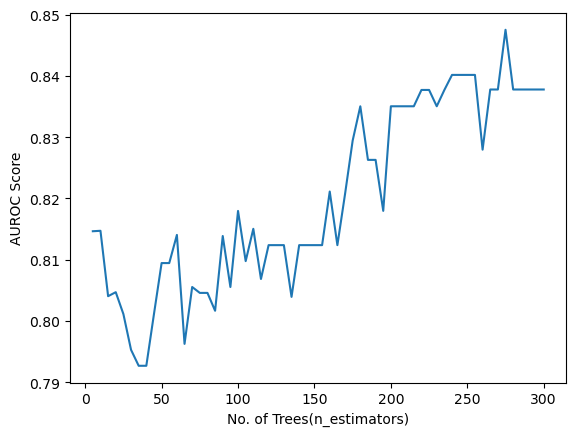

In [9]:
## Hyperparameter tuning for n_estimators
## Used to narrow down the GridSearchCV Parameters to a reasonable level


n_estimators = range(5,301,5)

param_g= {"n_estimators":n_estimators}

#Create a DecisionTreeClassfier and optimize the hyperparameters with GridSearchCV - auprc
dt_model_auprc = GridSearchCV(dt,param_grid=param_g, cv=skf, refit=True,scoring=scoring,verbose=2).fit(X_trainval, y_trainval)

dt_model_auprc.cv_results_['mean_test_score']
plt.plot(n_estimators,dt_model_auprc.cv_results_['mean_test_score'])

plt.xticks(rotation=0)
plt.xlabel("No. of Trees(n_estimators)")
plt.ylabel("AUROC Score")
plt.savefig('n_estimators.png',format="png",dpi=1000)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


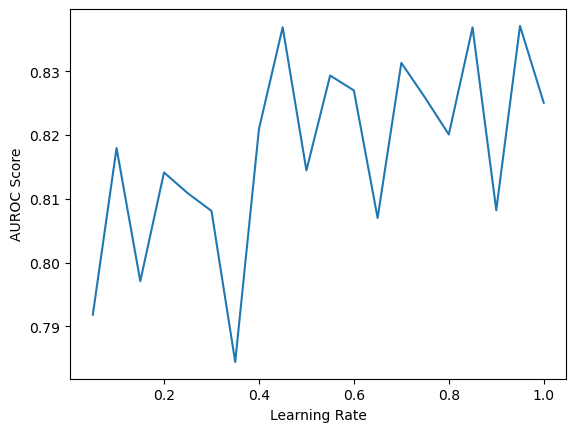

In [10]:
## Hyperparameter tuning for learning_rate
## Used to narrow down the GridSearchCV Parameters to a reasonable level

learning_rates = np.arange(0.05,1.01,0.05)

param_g= {"learning_rate":learning_rates}

dt_model_auprc = GridSearchCV(dt,param_grid=param_g, cv=skf, refit=True,scoring=scoring,verbose=2,n_jobs=-1).fit(X_trainval, y_trainval)

dt_model_auprc.cv_results_['mean_test_score']
plt.plot(learning_rates,dt_model_auprc.cv_results_['mean_test_score'])


plt.xticks(rotation=0)
plt.xlabel("Learning Rate")
plt.ylabel("AUROC Score")
plt.savefig('learning_rate.png',format="png",dpi=1000)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


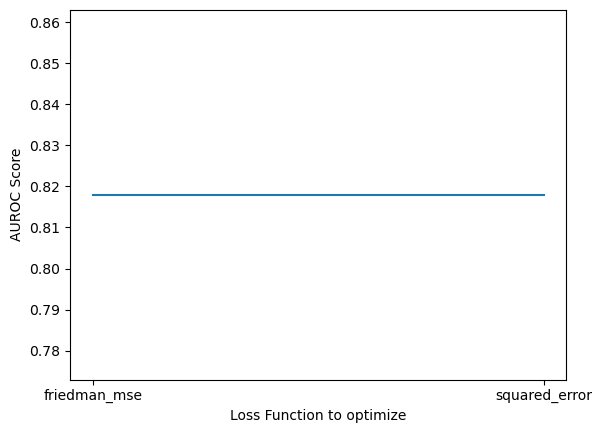

In [11]:
## Hyperparameter tuning for information criteria
## Used to narrow down the GridSearchCV Parameters to a reasonable level

information_criterion = ["friedman_mse", "squared_error"]

param_g= {"criterion":information_criterion}

dt_model_auprc = GridSearchCV(dt,param_grid=param_g, cv=skf, refit=True,scoring=scoring,verbose=2,n_jobs=-1).fit(X_trainval, y_trainval)

dt_model_auprc.cv_results_['mean_test_score']
plt.plot(information_criterion,dt_model_auprc.cv_results_['mean_test_score'])

plt.xticks(rotation=0)
plt.xlabel("Loss Function to optimize")
plt.ylabel("AUROC Score")
plt.savefig('criterion.png',format="png",dpi=1000)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


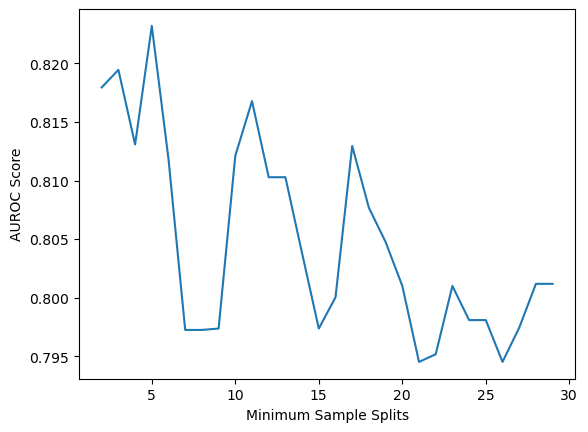

In [12]:
## Hyperparameter tuning for Min Sample Splits
## Used to narrow down the GridSearchCV Parameters to a reasonable level

min_sam_split = range(2,30)
param_g= {"min_samples_split":min_sam_split}

dt_model_auprc = GridSearchCV(dt,param_grid=param_g, cv=skf, refit=True,scoring=scoring,verbose=2,n_jobs=-1).fit(X_trainval, y_trainval)

dt_model_auprc.cv_results_['mean_test_score']
plt.plot(min_sam_split,dt_model_auprc.cv_results_['mean_test_score'])

plt.xticks(rotation=0)
plt.xlabel("Minimum Sample Splits")
plt.ylabel("AUROC Score")
plt.savefig('min_samples_split.png',format="png",dpi=1000)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


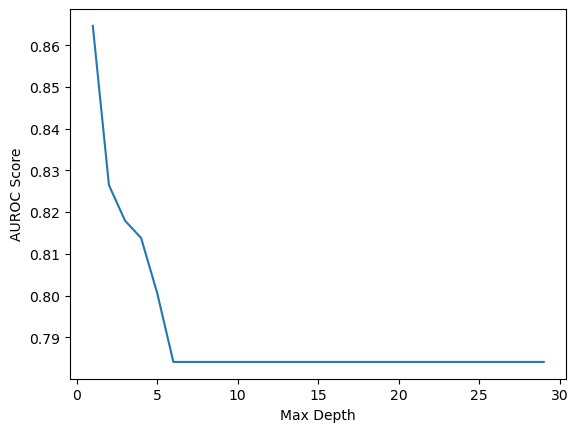

In [13]:
## Hyperparameter tuning for Max Tree Depth
## Used to narrow down the GridSearchCV Parameters to a reasonable level

tree_d = range(1,30)

param_g= {"max_depth":tree_d}

dt_model_auprc = GridSearchCV(dt,param_grid=param_g, cv=skf, refit=True,scoring=scoring,verbose=2,n_jobs=-1).fit(X_trainval, y_trainval)

dt_model_auprc.cv_results_['mean_test_score']
plt.plot(tree_d,dt_model_auprc.cv_results_['mean_test_score'])

plt.xticks(rotation=0)
plt.xlabel("Max Depth")
plt.ylabel("AUROC Score")
plt.savefig('max_depth.png',format="png",dpi=1000)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


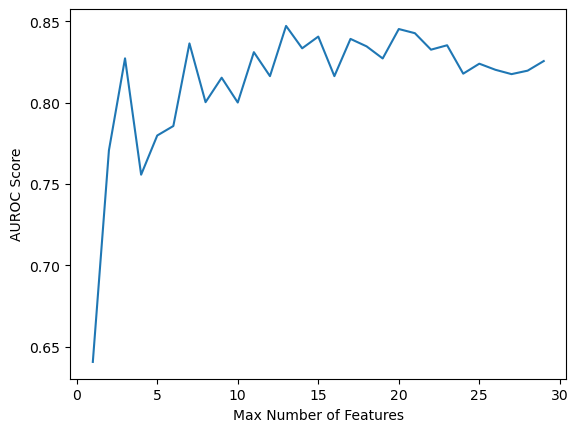

In [14]:
## Hyperparameter tuning for Max Features
## Used to narrow down the GridSearchCV Parameters to a reasonable level
max_features = range(1,30)

param_g= {"max_features":max_features}

#Create a DecisionTreeClassfier and optimize the hyperparameters with GridSearchCV - auprc
dt_model_auprc = GridSearchCV(dt,param_grid=param_g, cv=skf, refit=True,scoring=scoring,verbose=2,n_jobs=-1).fit(X_trainval, y_trainval)

dt_model_auprc.cv_results_['mean_test_score']
plt.plot(max_features,dt_model_auprc.cv_results_['mean_test_score'])

plt.xticks(rotation=0)
plt.xlabel("Max Number of Features")
plt.ylabel("AUROC Score")
plt.savefig('max_features.png',format="png",dpi=1000)